In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
with open("results") as f:
    results = json.loads(f.read())

In [3]:
single_results = []
for res in results:
    res_type = res["type"]
    if "-s" in res_type:
        single_results.append((int(res_type.split()[-1]), res['throughput'][0]))
single_results = zip(*single_results)

In [4]:
single_results

[(1, 2, 4, 8, 16, 32),
 (49225483, 74588423, 121923078, 225443087, 297877105, 373070862)]

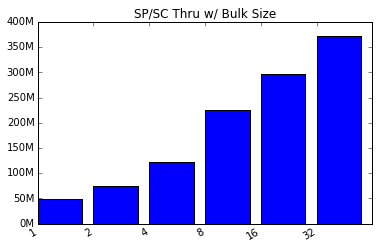

In [28]:
fig, ax = plt.subplots()

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x*1e-6)

formatter = FuncFormatter(millions)

plt.bar(list(range(len(single_results[0]))), single_results[1])
plt.xticks(list(range(len(single_results[0]))),single_results[0])
ax.yaxis.set_major_formatter(formatter)
plt.title("SP/SC Thru w/ Bulk Size")
fig.autofmt_xdate()

In [57]:
mt_result = {}
for res in results:
    res_type = res["type"]
    if "-m" in res_type:
        num, bs = map(int, res_type.split()[1::2])
        thru = mean(res["throughput"])
        enq_cas = (mean(res["enq_cas_tries"]) - 100*1000*1000)/(100.*1000*1000)
        deq_cas = (mean(res["deq_cas_tries"]) - 100*1000*1000)/(100.*1000*1000)
        mt_result[(num,bs)] = (thru, enq_cas, deq_cas)

In [85]:
mt_thru = [(k[0], v[0]) for k,v in mt_result.items() if k[1] == 1]
import operator
mt_thru_x, mt_thru_y = zip(*sorted(mt_thru, key=operator.itemgetter(1)))

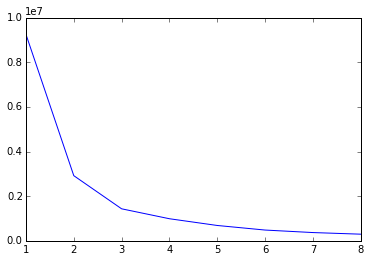

In [86]:
plot(mt_thru_x, mt_thru_y)

In [5]:
result = {'-m 7 -b 1': {'throughput': [321527, 320908, 320602, 320419, 319946, 319924, 319010], 'deq_cas_tries': [11577938, 11701869, 11778276, 11843879, 12062902, 12076329, 13278760], 'type': '-m 7 -b 1', 'enq_cas_tries': [15779778, 16019553, 16230702, 16454608, 16607874, 16630463, 16726597]}, '-m 5 -b 1': {'throughput': [579160, 578689, 576693, 576230, 573916], 'deq_cas_tries': [12322174, 12386583, 12554010, 12593626, 13233494], 'type': '-m 5 -b 1', 'enq_cas_tries': [13001059, 13141129, 13341367, 13393515, 13684066]}, '-m 4 -b 1': {'throughput': [815168, 813566, 811715, 802063], 'deq_cas_tries': [12248457, 12300497, 12426003, 13214447], 'type': '-m 4 -b 1', 'enq_cas_tries': [12802322, 13031020, 13133200, 13083005]}, '-m 2 -b 1': {'throughput': [2272439, 2221689], 'deq_cas_tries': [11639375, 11815766], 'type': '-m 2 -b 1', 'enq_cas_tries': [13387544, 13367985]}, '-m 8 -b 1': {'throughput': [255016, 254684, 254222, 254217, 254042, 254020, 254012, 253995], 'deq_cas_tries': [11531297, 11616498, 11795294, 11805527, 11952930, 11949259, 11998155, 12079885], 'type': '-m 8 -b 1', 'enq_cas_tries': [19056137, 19516069, 19869733, 19998390, 19930293, 20139488, 20114009, 20233494]}, '-m 1 -b 1': {'throughput': [4626158], 'deq_cas_tries': [10000000], 'type': '-m 1 -b 1', 'enq_cas_tries': [10000000]}, '-m 6 -b 1': {'throughput': [421475, 419342, 418497, 418461, 417321, 415812], 'deq_cas_tries': [11772230, 11993576, 12097432, 12111595, 12462330, 13328691], 'type': '-m 6 -b 1', 'enq_cas_tries': [14426238, 14616566, 14874176, 14908668, 14961911, 15019648]}, '-m 3 -b 1': {'throughput': [1130390, 1126594, 1126203], 'deq_cas_tries': [11852881, 11983053, 11970567], 'type': '-m 3 -b 1', 'enq_cas_tries': [13654598, 13659914, 13724176]}}

In [6]:
for m in range(1,9):
    bench_type_str = '-m ' + str(m) + ' -b 1'
    res = result[bench_type_str]
    thru = mean(res['throughput'])
    enq_cas = (mean(res["enq_cas_tries"]) - 10*1000*1000)/(10.*1000*1000)
    deq_cas = (mean(res["deq_cas_tries"]) - 10*1000*1000)/(10.*1000*1000)
    print("{}, {}, {}, {}".format(thru, thru*m, enq_cas, deq_cas))

4626158.0, 4626158.0, 0.0, 0.0
2247064.0, 4494128.0, 0.33777645, 0.17275705
1127729.0, 3383187.0, 0.367956266667, 0.193550033333
810628.0, 3242512.0, 0.301238675, 0.2547351
576937.6, 2884688.0, 0.33122272, 0.26179774
418484.666667, 2510908.0, 0.480120116667, 0.2294309
320333.714286, 2242336.0, 0.634993928571, 0.204570757143
254276.0, 2034208.0, 0.9857201625, 0.1841105625
